<a href="https://colab.research.google.com/github/iKPetr/ai/blob/master/neiron001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

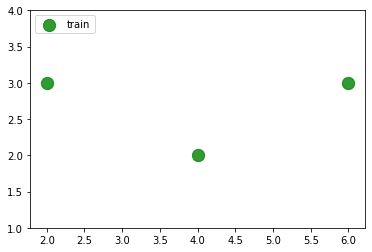

In [53]:
import torch
import matplotlib.pyplot as plt
from IPython.display import Image, clear_output
import numpy
from time import sleep

x = torch.tensor([[2.0],[4.0],[6.0]])
y = torch.tensor([[3.0],[2.0],[3.0]])

plt.scatter(x.numpy(), y.numpy(), c='g', s=150, alpha=0.8, label='train')
plt.legend(loc='upper left')
# plt.ylim установим y-пределы текущих осей.
plt.ylim((1, 4))
plt.show()


In [0]:
net_1 = torch.nn.Sequential(
    torch.nn.Linear(1, 6,bias=False),
    torch.nn.Sigmoid(),
    torch.nn.Linear(6, 5,bias=False),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5, 1,bias=False)
)

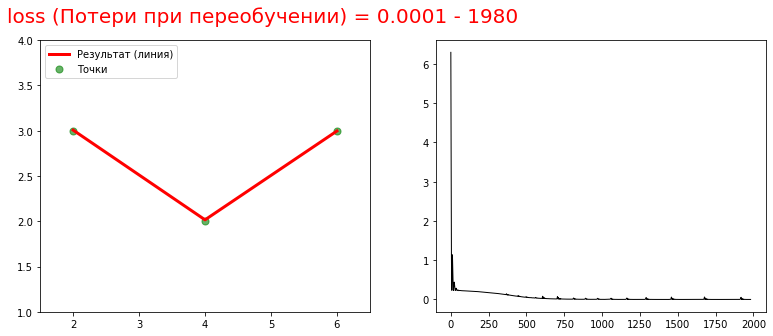

In [55]:


optimizer_ofit = torch.optim.Adam(net_1.parameters(), lr=0.1)
# Создает критерий, который измеряет среднюю квадратическую ошибку (квадратную норму L2) между каждым элементом на входе x и целевым y
loss_func = torch.nn.MSELoss()
error = []

epoch = 2000
for t in range(epoch):
    # Получим ответ сети на х наборе данных
    pred = net_1(x)    
    # получим ошибку, ошибка будет одно число item() - возвращает значение тензора, как стандартное пайтон число, только для 1го значения
    loss = loss_func(pred, y)    
    error.append(loss.data.item())
    # Cделаем шаг градиентного спуска
    optimizer_ofit.zero_grad()
    loss.backward()
    optimizer_ofit.step()
           
    if t % 20 == 0:
        # очищает выход текущей ячейки, wait - ждать пока будет новые данных
        clear_output(wait=True)
        # Метод Sleep() приостанавливает выполнение на заданное количество секунд.
        sleep(0.05)
        
        fig = plt.figure()
        # первое - количество строк;второе - количество столбцовтретье - индекс ячейки.
        ax1 = fig.add_subplot(1,2,1)
        ax1.text(1, 4.2, 'loss (Потери при переобучении) = %.4f - %s' %(loss,t), fontdict={'size': 20, 'color':  'red'})
        ax1.scatter(x.data.numpy(), y.data.numpy(), c='g', s=50, alpha=0.6, label='Точки')
        plt.plot(x.data.numpy(), pred.data.numpy(), c='r', lw=3, label='Результат (линия)')                
        # место вывода легенды
        ax1.legend(loc='upper left');         
        plt.ylim((1, 4))
        plt.xlim((1.5, 6.5))
        
        ax2 = fig.add_subplot(1,2,2)
        Xe = []
        for ep in range(t+1):
          Xe.append(ep+1)
        ax2.plot(Xe,error, color="black",linewidth=1)  
  
        fig.set_figwidth(13) #  ширина и
        fig.set_figheight(5) #  высота "Figure"
        plt.show()         


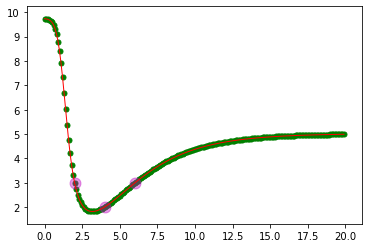

In [56]:
start = 0
end = 20
m = numpy.arange(start,end , 0.1)
xp = torch.Tensor(m).view(m.size,-1)
yp = net_1(xp)

plt.plot(xp.numpy(), yp.data.numpy(), 'r', lw=1)
plt.scatter(xp.numpy(), yp.data.numpy(), c='g', s=25)
plt.scatter(x, y, c='m', s=120, alpha=0.4)
plt.show()

In [57]:
pred_ofit = net_1(x)
loss_ofit = loss_func(pred_ofit, y).data.numpy()
# запрос к сети Х и ответы от сети Y
print(numpy.ravel(x.detach()),numpy.ravel(pred_ofit.detach()))
# параметры сети
for p in net_1.parameters(): 
  print(p.detach())

[2. 4. 6.] [3.002431  2.0102682 2.9968433]
tensor([[-1.3592],
        [ 0.3173],
        [-1.3603],
        [ 1.3422],
        [-1.3613],
        [ 1.3408]])
tensor([[ 2.8038,  7.0949,  6.2694, -3.0945,  7.4764, -3.8691],
        [-0.8480, -2.0312, -0.8642, -2.1589, -0.9632, -2.4834],
        [ 2.0183,  4.5992,  4.0745, -2.5867,  4.9678, -3.1957],
        [ 4.1241,  5.9663,  5.2280, -2.9886,  6.3359, -3.3289],
        [ 2.9552,  8.5023,  8.6543, -3.7487, 10.5905, -4.0791]])
tensor([[2.9146, 0.6651, 1.2485, 2.0855, 3.4931]])
